# Word Embeddings

In [1]:
import gensim
import pandas
model = gensim.models.KeyedVectors.load_word2vec_format('data/PubMed-w2v.bin',  binary=True)
print("model loading complete")

model loading complete


In [2]:
def show_wemb(word):
    return(model[word], model.most_similar(word, topn=5))

In [3]:
show_wemb('atelectasis')

(array([-0.23673499, -0.4481991 ,  0.30250457, -0.20286322,  0.18694602,
        -0.15878507, -0.3010417 , -0.09386427, -0.19272074,  0.12198242,
         0.11348098, -0.09375317, -0.14881355,  0.22540739, -0.12198105,
        -0.37750322, -0.00137511,  0.27657032, -0.14257929, -0.46587306,
        -0.24941853, -0.02952368, -0.25832894, -0.34048975,  0.17877978,
         0.04530624, -0.09440142,  0.05741891,  0.05429044, -0.06828617,
         0.17586815,  0.4502523 , -0.21335429,  0.08809736,  0.00980601,
         0.12982392,  0.19008146, -0.07034857, -0.13614759, -0.06564466,
        -0.15269096, -0.26653668,  0.13202852, -0.15569419, -0.05258747,
        -0.13559096, -0.17589572, -0.16365717, -0.23109815, -0.34404707,
         0.09919615,  0.05672965,  0.17051831,  0.1676709 , -0.17358525,
        -0.41364306, -0.38710663,  0.07760689,  0.2376216 , -0.3388885 ,
        -0.12057309, -0.0730748 ,  0.2541976 , -0.37297913,  0.2961591 ,
         0.24444568,  0.09002301,  0.19271661,  0.2

In [4]:
show_wemb('hypertension')

(array([-0.33040273, -0.09043823,  0.04094224, -0.03693173,  0.00720769,
        -0.0092717 , -0.12369595, -0.26870164, -0.16244859, -0.06971864,
        -0.06666104,  0.05075341,  0.08185872,  0.4354743 ,  0.24756862,
        -0.08772765,  0.07420239, -0.06486768,  0.15946147, -0.13038492,
         0.08428849,  0.00484104, -0.12631701, -0.15448771, -0.07290309,
        -0.32272953, -0.11203589,  0.03858548, -0.2549499 , -0.23189627,
         0.14787807,  0.13872612,  0.13541095, -0.11976493,  0.17533028,
        -0.29993233,  0.18555349,  0.28802982, -0.12800391, -0.0882471 ,
        -0.4558257 ,  0.10342131, -0.09078661,  0.03413086,  0.14723638,
        -0.07716384, -0.00359705, -0.24691139, -0.23110493, -0.27832708,
         0.40153944, -0.21914798, -0.31377453, -0.04738419, -0.22555661,
        -0.2769271 ,  0.16373867,  0.16551629,  0.1549743 ,  0.4941901 ,
         0.12916064,  0.08773155,  0.68544084, -0.5410882 ,  0.17279352,
         0.08768956,  0.5538039 ,  0.13779847,  0.0

In [10]:
show_wemb("stone")

(array([ 2.06363752e-01, -2.83867329e-01, -4.54637557e-02, -2.78564245e-02,
         1.42791778e-01,  3.84920657e-01, -1.73839062e-01,  4.23910528e-01,
         1.78919062e-01, -1.33587703e-01,  3.76505442e-02, -5.20104051e-01,
        -2.73584813e-01, -7.91646242e-02, -5.15460372e-01, -2.63936549e-01,
         1.65194184e-01,  6.49278581e-01,  2.63819218e-01, -3.01292032e-01,
         6.60224408e-02,  1.07760601e-01,  4.52539980e-01,  8.38658586e-02,
         5.52095711e-01, -3.73547286e-01, -1.87004700e-01,  1.52009260e-02,
         9.93524864e-02, -4.36559729e-02,  1.38781369e-01,  4.83244359e-02,
        -8.86288360e-02,  1.75239503e-01,  9.70592201e-02,  1.54491872e-01,
         5.83601333e-02, -1.61165223e-01, -2.07324937e-01, -1.47549048e-01,
         6.79027066e-02, -1.33219421e-01,  2.99953017e-02, -1.54229090e-01,
         8.74811560e-02, -2.77482808e-01,  3.79253119e-01, -1.44318178e-01,
         1.14595659e-01, -5.94369881e-02, -1.17134228e-01,  2.16564313e-01,
         5.7

In [5]:
from io import open
import glob
import os

def findFiles(path): return glob.glob(path)
filenames = findFiles('data/word-classes/McIC-09/*.txt')
row_names = pandas.DataFrame(list(map(lambda fn: os.path.splitext(os.path.basename(fn))[0], filenames)))
row_names

,0
0,TUMR
1,SIGN
2,DRUG
3,MUTN
4,CLNE
5,ANTI
6,DISE
7,FUNC
8,CELL
9,PROT


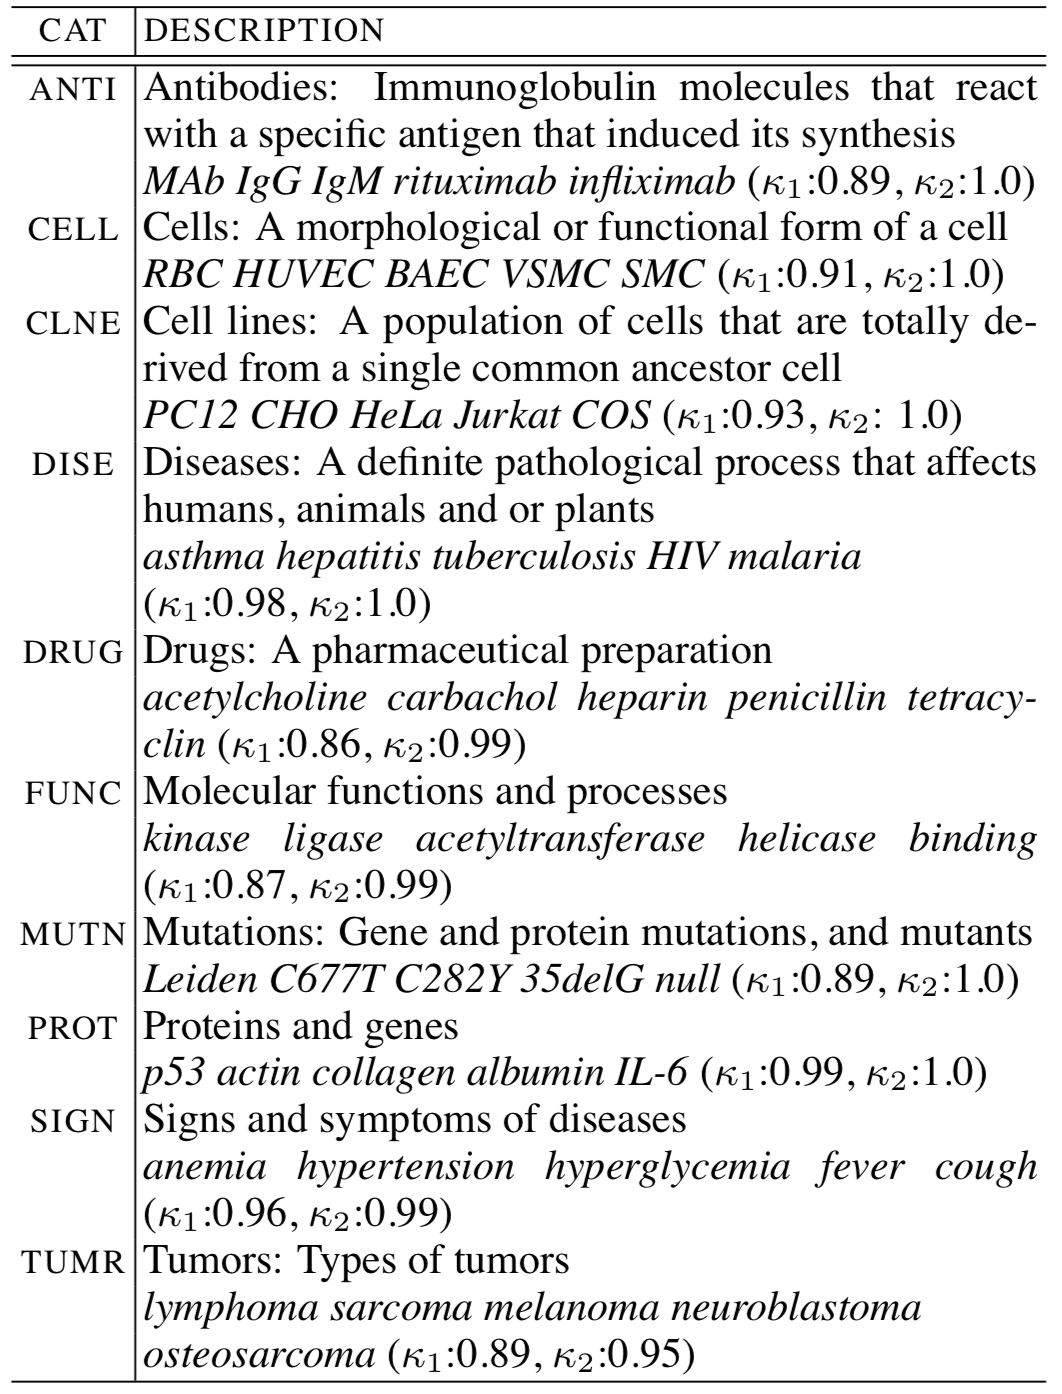

In [18]:
import random
keys = []
for filepath in filenames:
    with open(filepath) as f:
        keys.append(random.choice(f.read().splitlines()))

pandas.DataFrame(keys, index=row_names[0])

,0
0,
TUMR,sarcoma
SIGN,anemia
DRUG,tetracycline
MUTN,C282Y
CLNE,HeLa
ANTI,MAb
DISE,malaria
FUNC,binding
CELL,BAEC


In [7]:
embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

pandas.DataFrame(word_clusters, index=row_names[0])

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,,,,,,,,,,,,,,,,,,,,,
TUMR,chondrosarcoma,osteosarcomas,neuroblastoma,medulloblastoma,rhabdomyosarcoma,glioma,fibrosarcoma,melanoma,hepatoblastoma,ESFT,...,HS-Os-1,LM8,MG-63,neuroblastomas,astrocytoma/glioblastoma,U-2OS,143B,non-metastatic,PTHrP-producing,neuroepithelioma
SIGN,hypertention,hypertensions,HTN,dyslipemia,renoparenchymatous,hyperlipidaemia,dislipidemia,hyperlipidemia,renoparenchymal,Low-renin,...,hypercholesterolemia,hyphex,Renin-dependent,malignant-phase,pregnancy-aggravated,isolated-office,dyslipoproteinaemia,White-coat,RVH,renal-wrap
DRUG,erythromycin,ampicillin,spectinomycin,kanamycin,gentamycin,lincomycin,tetracyclin,trimethoprim,clindamycin,streptomycin,...,mecillinam,tetracyclines,ciprofloxacin,oxacillin,dicloxacillin,cefalotin,nitrofurantoin,neomycin,spiramycin,Tetracycline
MUTN,235delC,c.35delG,V37I,167delT,GJB2,W24X,H1069Q,Cys282Tyr,R408W,delE120,...,delGJB6-D13S1830,heterozygosis,299-300delAT,R778L,p.M34T,SLC26A4,His63Asp,238-239insC,R83C,R245X
CLNE,PC-12,PC12h,PC12D,Neuro2A,Neuro2a,SH-SY5Y,Neuro-2a,RGC-5,HT22,Neuro-2A,...,N2A,SY5Y,PC12m3,N18TG-2,NG108,SK-N-MC,B104,astroglial,MES23.5,SK-N-SH
ANTI,Rituximab,alemtuzumab,rituxan,rituximab-based,Campath-1H,ofatumumab,rituximab-CHOP,fludarabine,R-THP-COP,campath-1H,...,CHOP-R,chemoimmunotherapy,hyper-CVAD,IVCY,bortezomib-based,chlorambucil,rituximab-containing,cyclophosphamide/doxorubicin/vincristine/predn...,R-HyperCVAD,dose-intense
DISE,TB,kansasii,avium-intracellulare,xenopi,mycobacterium,MTB,malmoense,haemophilum,isoniazid-resistant,genavense,...,avium/Mycobacterium,lentiflavum,intracellulare,non-tuberculosis,H37Rv,thermoresistibile,MDR-TB,MDRTB,leprae,chelonae
FUNC,acetyl-transferase,ChAT,acetyltranferase,acetylase,acetylcholine-synthesizing,promoter/chloramphenicol,Acetyltransferase,acetyltransferase-like,promoter-chloramphenicol,2.3.1.6.,...,2.3.1.28,acetyl-CoA:1-alkyl-2-lyso-sn-glycero-3-phospho...,PEPCK-chloramphenicol,YfiQ,3-N-aminoglycoside,2.3.1.35,choline-O-acetyltransferase,choline-acetyl,GCN5,lyso-PAF:acetyl-CoA
CELL,VSMCs,SMC,ASMC,HASMC,RASMCs,hVSMC,SMCs,RASMC,PASMC,vSMC,...,HVSMC,HPASMC,CASMCs,HVSMCs,BSMC,HASM,PVSMC,PDGF-stimulated,hSMC,AoSMC


In [8]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=20, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

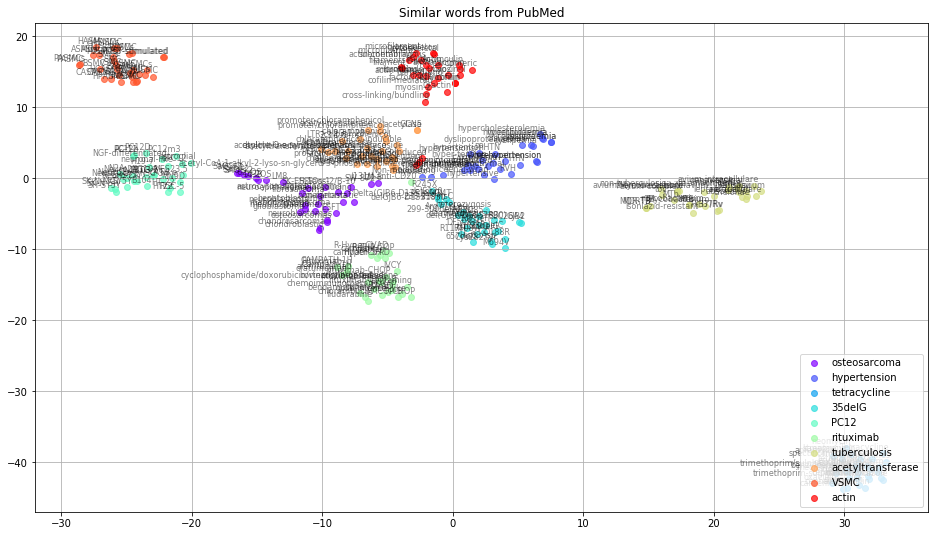

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline

def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from PubMed', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


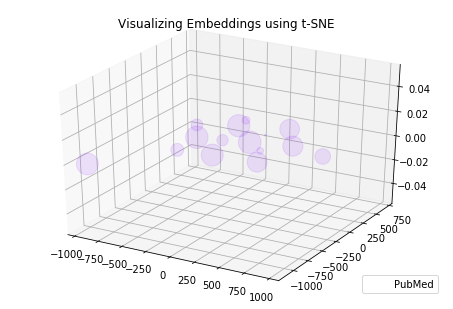

In [38]:
from mpl_toolkits.mplot3d import Axes3D

tsne_wp_3d = TSNE(perplexity=30, n_components=3, init='pca', n_iter=3500, random_state=12)
embeddings_wp_3d = tsne_wp_3d.fit_transform(embeddings)

def tsne_plot_3d(title, label, embeddings, a=1):
    fig = plt.figure()
    ax = Axes3D(fig)
    colors = cm.rainbow(np.linspace(0, 1, 1))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], embeddings[:, 2], c=colors, alpha=a, label=label)
    plt.legend(loc=4)
    plt.title(title)
    plt.show()

tsne_plot_3d('Visualizing Embeddings using t-SNE', 'PubMed', embeddings_wp_3d, a=0.1)